# `chessrl` package

In [1]:
from chessrl import Env, LichessDefender, SyzygyDefender, RandomDefender
from chessrl import chess_py as cp

2025-08-28 19:25:00,021 - INFO - Loading config file...


ImportError: cannot import name 'RandomDefender' from 'chessrl' (/home/giovanni/Desktop/chess_RL/python/chessrl/__init__.py)

In [2]:
from chessrl import utils

# If the above doesn't work, try one of these alternatives:
# from chessrl.utils import create_endgames
# import chessrl.create_endgames

The `Env` class defines the reinforcement learning environment. It can be initialized giving the FEN representation of a chess game, the step penalty (to favor faster mate) and the defender (`LichessDefender` or `SyzygyDefender`) that plays moves for the black side.

The env class treats the black turn as part of the environment response to the white move.

In [ ]:
fen = "1R6/K2k4/8/8/8/8/8/8 w - - 1 0"
env = Env.from_fen(
    fen,
    defender=LichessDefender(),    # auto-reply using Lichess tablebase
    absorb_black_reply=True
)
env.display_state(save_path="state.png")
# 2. White plays a move (UCI or Move object)
agent_move = "b8b7"
result = env.step(agent_move)

# 3. Print outcome and environment info
print("Step result:", result)
print(env.to_string())
env.display_state()


note that after the white move we have the black response, played thanks to Lichess API

In [5]:
g = env.state()
stm = g.get_side_to_move()
print("Side to move:", "BLACK" if stm == cp.Color.BLACK else "WHITE")
print("in_check(BLACK):", g.get_check(cp.Color.BLACK) if hasattr(g, "get_check") else g.in_check())
print("is_checkmate:", g.is_checkmate())
print("is_stalemate:", g.is_stalemate())

# Count legal replies for White
moves = g.legal_moves(cp.Color.WHITE)
print("num legal moves for White:", len(moves))
print("sample replies (up to 5):", [cp.Move.to_uci(m) for m in moves[:5]])

print("is_game_over():", g.is_game_over())

print("is insufficient material():", g.is_insufficient_material())


Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
num legal moves for White: 16
sample replies (up to 5): ['a7a6', 'a7a8', 'a7b8', 'b7b1', 'b7b2']
is_game_over(): False
is insufficient material(): False


## Syzygy Defender

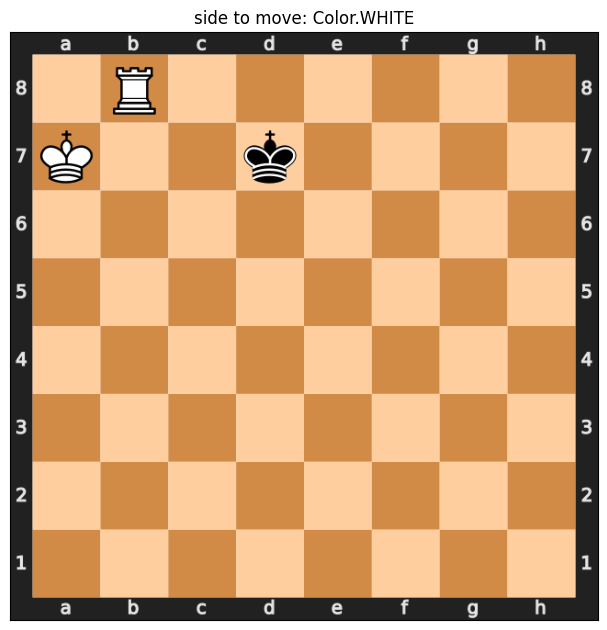

In [12]:
env = Env.from_fen(
    "1R6/K2k4/8/8/8/8/8/8 w - - 1 0",
    defender=SyzygyDefender("../../tablebase/"),   # or SyzygyDefender("/path/to/tables")
)
env.display_state()

In [13]:
agent_move = "b8b7"
result = env.step(agent_move)

# 3. Print outcome and environment info
print("Step result:", result)
print(env.to_string())
env.display_state()


RuntimeError: Failed to probe DTZ for position 4k3/KR6/8/8/8/8/8/8 w - - 1 2

In [14]:
g = env.state()
stm = g.get_side_to_move()
print("Side to move:", "BLACK" if stm == cp.Color.BLACK else "WHITE")
print("in_check(BLACK):", g.get_check(cp.Color.BLACK) if hasattr(g, "get_check") else g.in_check())
print("is_checkmate:", g.is_checkmate())
print("is_stalemate:", g.is_stalemate())

# Count legal replies for White
moves = g.legal_moves(cp.Color.WHITE)
print("num legal moves for White:", len(moves))
print("sample replies (up to 5):", [cp.Move.to_uci(m) for m in moves[:5]])

print("is_game_over():", g.is_game_over())

print("is insufficient material():", g.is_insufficient_material())


Side to move: BLACK
in_check(BLACK): True
is_checkmate: False
is_stalemate: False
num legal moves for White: 0
sample replies (up to 5): []
is_game_over(): False
is insufficient material(): False


## testing stalemate

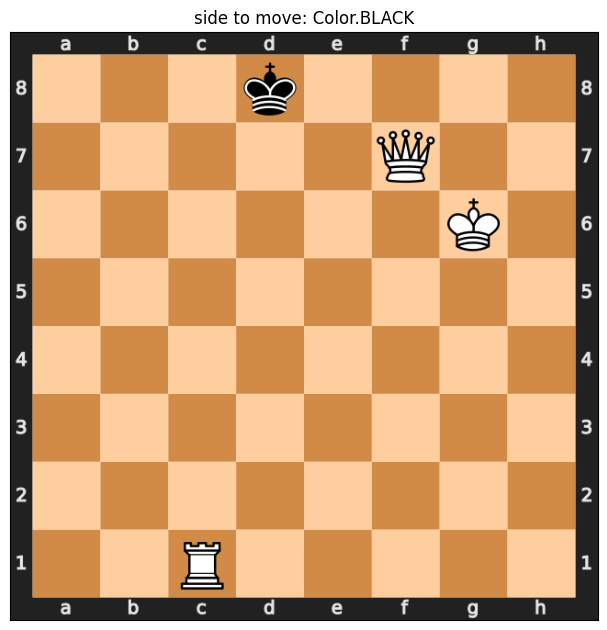

In [16]:
env = Env.from_fen(
    "3k4/5Q2/6K1/8/8/8/8/2R5 b - - 1 0",
)
env.display_state()

In [12]:
g = env.state()
stm = g.get_side_to_move()
print("Side to move:", "BLACK" if stm == cp.Color.BLACK else "WHITE")
print("in_check(BLACK):", g.get_check(cp.Color.BLACK) if hasattr(g, "get_check") else g.in_check())
print("is_checkmate:", g.is_checkmate())
print("is_stalemate:", g.is_stalemate())

# Count legal replies for White
moves = g.legal_moves(cp.Color.WHITE)
print("num legal moves for White:", len(moves))
print("sample replies (up to 5):", [cp.Move.to_uci(m) for m in moves[:5]])

print("is_game_over():", g.is_game_over())

print("is insufficient material():", g.is_insufficient_material())

print("result:", g.result())

Side to move: BLACK
in_check(BLACK): False
is_checkmate: False
is_stalemate: True
num legal moves for White: 0
sample replies (up to 5): []
is_game_over(): True
is insufficient material(): False
result: 0.0


## Initial state generation

In [1]:
from chessrl.utils.mate_positions import generate_endgames_offline

# KR vs K, White to move, exact mate-in-2
fens = generate_endgames_offline("KRvK", mate_in=3, side_to_move="w",
                                 max_positions=100, max_tries=50000)
print(len(fens))
for f in fens[:5]:
    print(f)


ModuleNotFoundError: No module named 'chessrl'

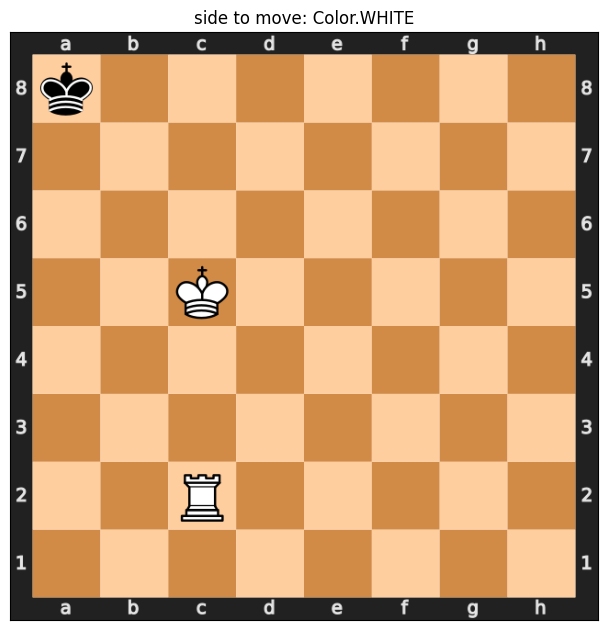

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


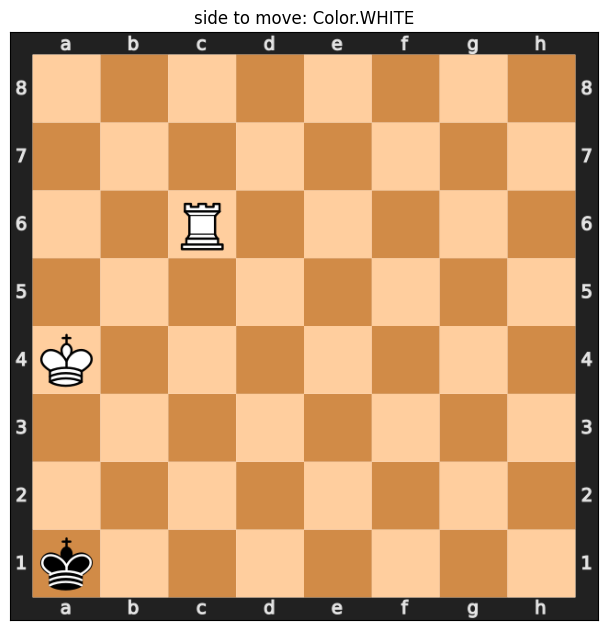

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


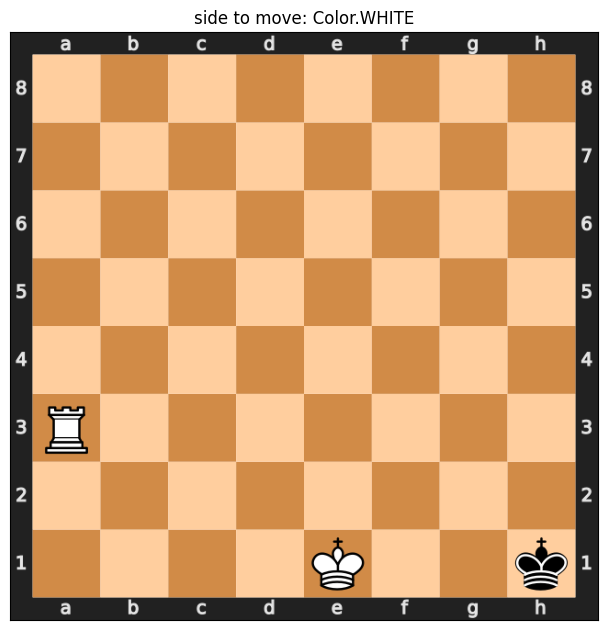

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


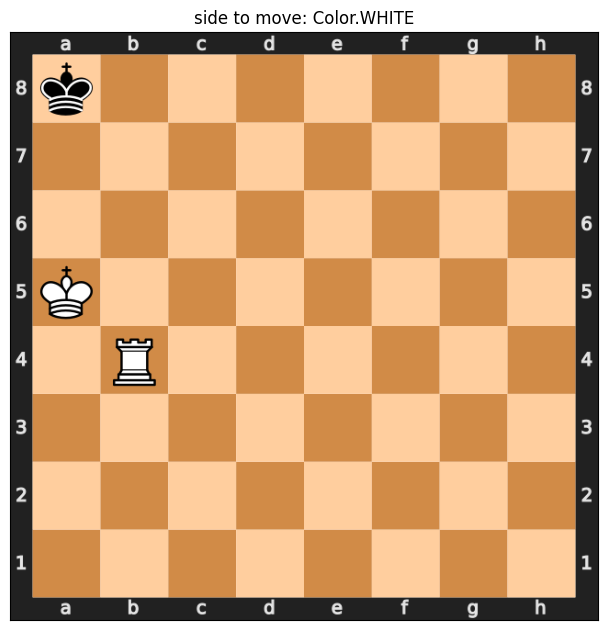

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


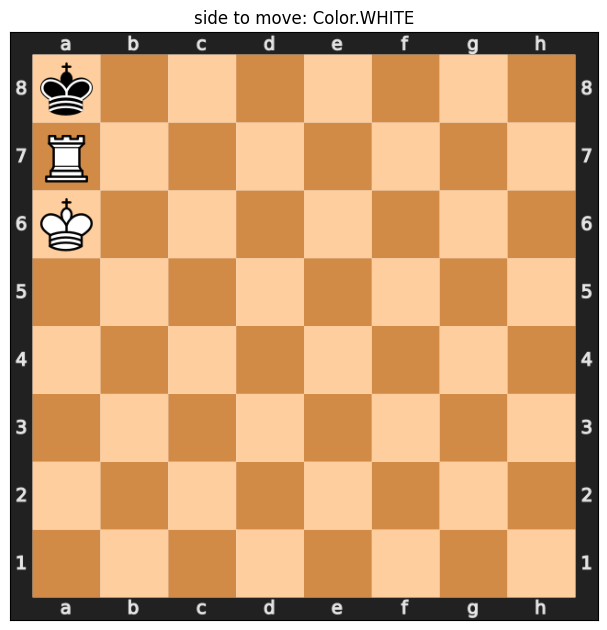

Side to move: WHITE
in_check(BLACK): True
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


In [10]:
for f in fens[:5]:
    env = Env.from_fen(f, step_penalty=0.01)
    env.display_state()
    g = env.state()
    stm = g.get_side_to_move()
    print("Side to move:", "BLACK" if stm == cp.Color.BLACK else "WHITE")
    print("in_check(BLACK):", g.get_check(cp.Color.BLACK) if hasattr(g, "get_check") else g.in_check())
    print("is_checkmate:", g.is_checkmate())
    print("is_stalemate:", g.is_stalemate())
    print("is_game_over():", g.is_game_over())
    print("is insufficient material():", g.is_insufficient_material())

## generating random positions (no info about the mate)

In [12]:
from chessrl.utils.mate_positions import sample_random_position, sample_random_positions


# 1 random KR vs K position (any terminal status allowed)
fen = sample_random_position("KRvK", side_to_move="w", seed=42)
print(fen)

# 10 non-terminal KQ vs K positions (smart bias on)
fens = sample_random_positions("KQvK", side_to_move="w", count=10, require_nonterminal=True)
print(len(fens), "positions")


8/1R6/8/8/8/8/8/k2K4 w - - 0 1
10 positions


## Syzygy 

In [4]:
import math, chess, chess.syzygy
with chess.syzygy.open_tablebase("/home/giovanni/syzygy-tables") as tb:
    board = chess.Board("8/8/4k3/8/3K4/8/8/2R5 w - - 0 1")  # example KRK
    dtz_plies = tb.probe_dtz(board)         # Syzygy DTZ in *plies*
    dtm_moves = math.ceil(dtz_plies / 2.0)  # for these endings, equals DTM in moves
    print("WDL:", tb.probe_wdl(board), "DTZ plies:", dtz_plies, "DTM moves:", dtm_moves)


WDL: 2 DTZ plies: 21 DTM moves: 11


Note: DTZ and DTM are equivalent for endgames in which there are no pawn or pieces to be captured

In [17]:
from chessrl.utils.endgame_loader import load_positions

In [22]:
positions, _ = load_positions(csv_path='../../tablebase/krk/krk_train.csv')

In [26]:
positions[0]['fen']

'2K5/8/R7/8/8/8/8/2k5 w - - 0 1'

## Random Defender

In [1]:
from chessrl import Env, LichessDefender, SyzygyDefender, RandomDefender
from chessrl import chess_py as cp

2025-08-28 19:26:13,808 - INFO - Loading config file...


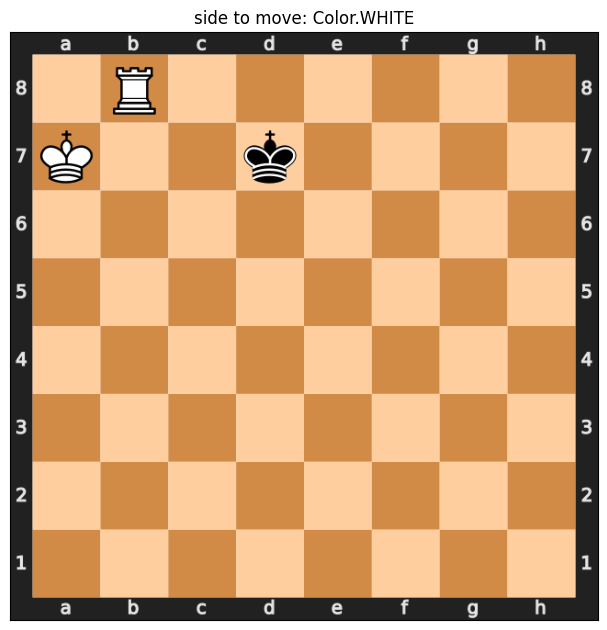

Step result: StepResult(reward=-2.0, done=False, info={'absorbed_reply': True, 'reply_uci': 'd7c8'})
Current FEN: 2k5/KR6/8/8/8/8/8/8 w - - 0 1
Current Board:
(board print unavailable)
Side to move: White
Is Game Over: No
Current Ply: 2



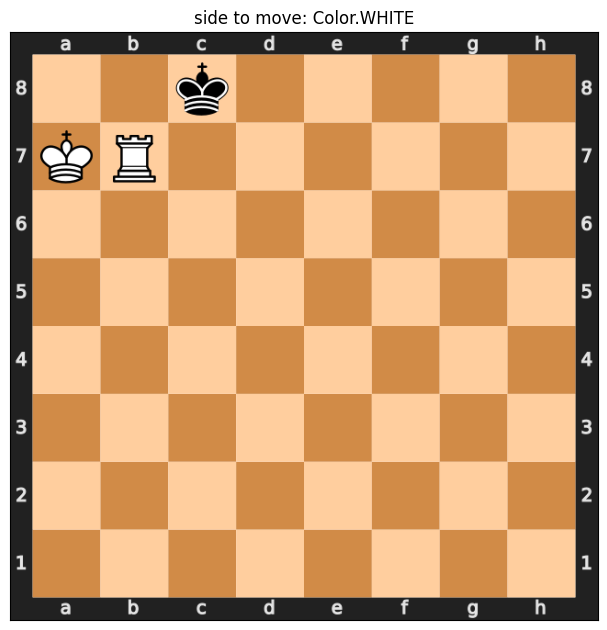

In [7]:
fen = "1R6/K2k4/8/8/8/8/8/8 w - - 1 0"
env = Env.from_fen(
    fen,
    defender=RandomDefender(0),
    absorb_black_reply=True
)
env.display_state()
# 2. White plays a move (UCI or Move object)
agent_move = "b8b7"
result = env.step(agent_move)

# 3. Print outcome and environment info
print("Step result:", result)
print(env.to_string())
env.display_state()
